<a href="https://colab.research.google.com/github/zhirongwang94/csm148/blob/main/project2/save2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSM148 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-4) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 3 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [567]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [568]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [569]:
# Helper function that allows you to draw nicely formatted confusion matrices

def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [570]:
# Helper funct
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

def draw_results(X_test, y_test, classifier_model):
  y_true = y_test;
  y_pred = classifier_model.predict(X_test)


  scores = precision_recall_fscore_support(y_true, y_pred, average='binary')
  f1 = f1_score(y_true, y_pred, average='binary')

  print("accuracy: ", classifier_model.score(X_test, y_test))
  print("precision: ", scores[0])
  print("recall: ", scores[1])
  print("f1_score: ", f1)
  print("confusion matrix: ", confusion_matrix(y_true, y_pred))
  draw_confusion_matrix(y_true, y_pred, ['positive', 'negative'])

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [571]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [572]:
!ls ./gdrive/MyDrive/datasets/heartdisease/

heartdisease.csv


In [573]:
csv_path = './gdrive/MyDrive/datasets/heartdisease/heartdisease.csv'
heartdisease = pd.read_csv(csv_path)

heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [574]:
heartdisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

In [575]:
type(heartdisease)

pandas.core.frame.DataFrame

In [576]:
heartdisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


[Use this area to describe any fields you believe will be problemmatic and why]

My Answer:  All the columns in our dataframe are numeric (either int or float), however our target variable 'sick' is a boolean and may need to be modified.

### Determine if we're dealing with any null values. If so, report on which columns? 

In [577]:
heartdisease.isnull().any(axis=None)


False

In [578]:
# heartdisease[1:3][["sex", "sick"]]

In [579]:
# heartdisease["sick"]

[Discuss here]

There is no null values in this dataframe. 

### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [580]:
heartdisease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
sick           bool
dtype: object

In [581]:
heartdisease["sick"].astype('int64').head(167)

0      0
1      0
2      0
3      0
4      0
      ..
162    0
163    0
164    0
165    1
166    1
Name: sick, Length: 167, dtype: int64

In [582]:
heartdisease['sick'].head(167)

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165     True
166     True
Name: sick, Length: 167, dtype: bool

In [583]:
boolean_sick_column = heartdisease["sick"].astype('int64')
boolean_sick_column

0      0
1      0
2      0
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    1
Name: sick, Length: 303, dtype: int64

In [584]:
heartdisease['sick'] = boolean_sick_column

In [585]:
heartdisease.head(167)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,0
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,0
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,0
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,1


### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ac0f12490>,
      dtype=object)

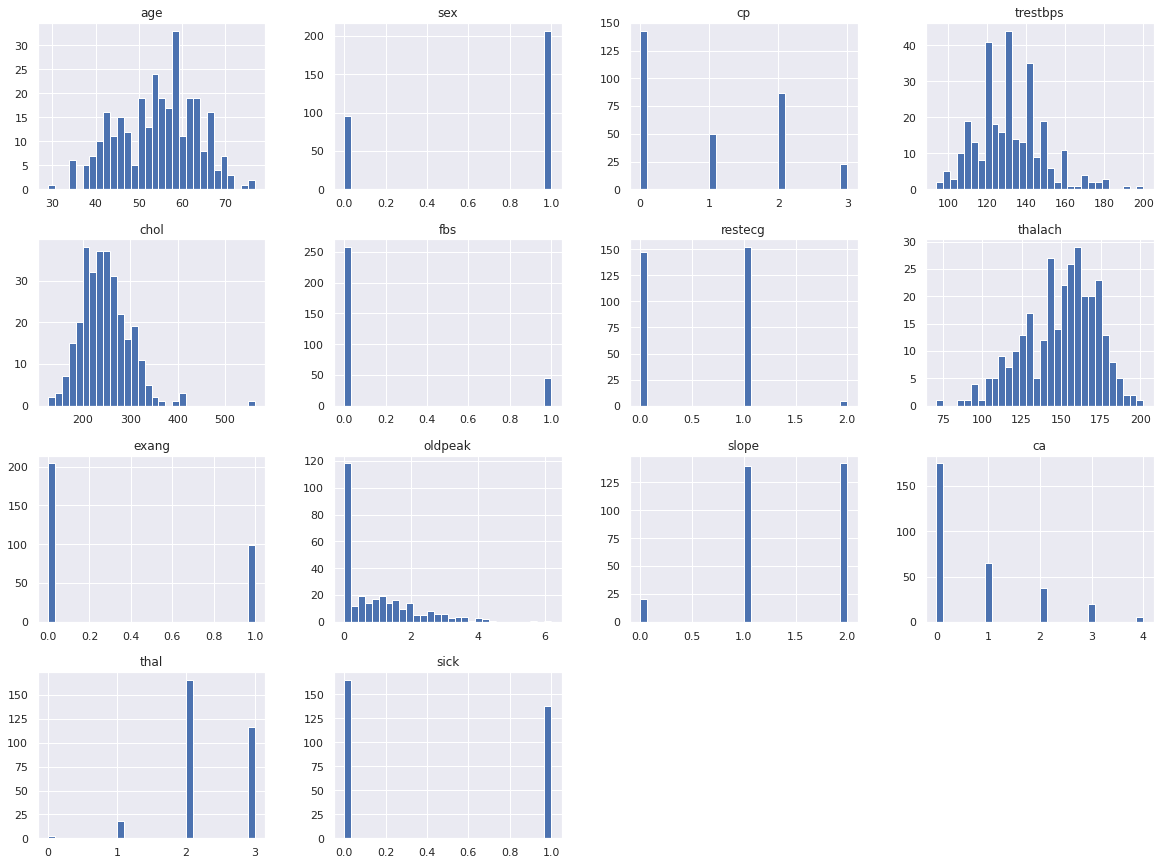

In [586]:
heartdisease.hist(bins=30, figsize=(20,15))

In [587]:
# binary features are: sex, fbs, examg
# limited selection features are: cp, restecg, slop, ca, thal
# gradient features are: age, trestbps, chol, thalach, oldpeak. 

### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

number of sick individuals:  138
number of healthy individuals:  165


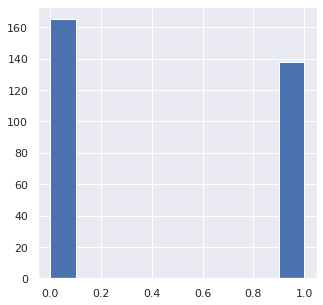

In [588]:
counts, bins = np.histogram(heartdisease['sick'])
heartdisease['sick'].hist(bins=bins, figsize=(5,5))
counts, bins

print("number of sick individuals: ", counts[9])
print("number of healthy individuals: ", counts[0])


[Include description of findings here] 

### Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

[Discuss prompt here] 


Balanced data are food for classification, but we loose information about the appearace frequencies, so it will affect the accuracy metrics and the production performance. Overbalancing the data will mkae the probability of being classified sick/healthy roughly 0.5. Thus, the classifier will forget about actual distribution of the target in the original sample. 

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

In [589]:
from pandas.plotting import scatter_matrix

heartdisease.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'sick'],
      dtype='object')

In [590]:
heartdisease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,-0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,-0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,-0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,0.430696


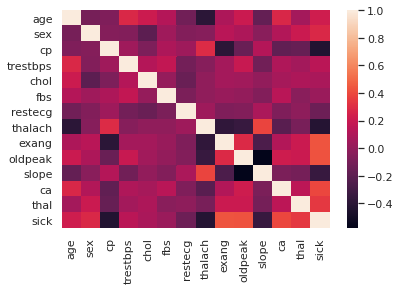

In [591]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

sns.heatmap(heartdisease.corr())

[Discuss correlations here] 

From the heatmap, we can easily see which columns are correlated to each other lightly or strongly. For example, we can tell thalach and slop column are strongly correlated. 

For the target, sick columnm, we find that exang and oldpeak ca, thal are strongly correlated to the target. Cp and thalach column is not very correlated to sick coloumn. 


## Part 2. Prepare the Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe. 

In [592]:
y = heartdisease['sick']
X = heartdisease.drop(columns=['sick'])

### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [593]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [594]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


### In lecture we learned about K-Nearest Neighbor. One thing we noted was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [595]:
# k-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


accuracy = knn_model.score(X_test, y_test)

print(knn_model.predict(X_test))
print(y_test.to_numpy())
print("Accuracy: ", accuracy)

[1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1]
[1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1]
Accuracy:  0.6885245901639344


### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler

### Pipeline:

There are several categorial featuream, but the weight of the categorial feature matters, so i don't need to use hot vector. I would like to use standardScaler to prepare the data

In [596]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler())])
X_prepared = pipe.fit_transform(X)
y_prepared = y

print(X_prepared.shape) 
print(y_prepared.shape) 

(303, 13)
(303,)


In [597]:
pd.DataFrame(X_prepared).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-1.319077e-17,-5.562565e-17,-7.146832e-16,-9.828955e-17,-3.664102e-19,2.652810e-16,-5.203025e-16,-5.203025e-16,-3.140136e-16,1.355718e-16,4.752341e-16,3.484561e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00


### Now split your pipelined data into an 80/20 split and again run the same KNN, and report out on it's accuracy. Discuss the implications of the different results you are obtaining.

In [598]:
# k-Nearest Neighbors algorithm
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y_prepared, test_size=0.2, random_state=42)


In [599]:
# Accuracy
# k-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

print("Prediction: ", neigh.predict(X_test))
print("Real labels: ",  y_test.to_numpy())

accuracy = knn_model.score(X_test, y_test)
print("Accuracy: ", accuracy)


Prediction:  [1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1]
Real labels:  [1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1]
Accuracy:  0.9180327868852459


[Discuss Results here]


The accuracy is 0.9180327868852459

### Parameter Optimization.  As we saw in lecture, the KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [600]:
for n in [1, 2, 3, 5, 7, 9, 10, 20, 50]:
  knn_model = KNeighborsClassifier(n_neighbors=n)
  knn_model.fit(X_train, y_train)

  accuracy = knn_model.score(X_test, y_test)
  print(n, ": ", accuracy)
  
  # The accuracy is the highest when n_neighbor equals to 5 or 7

1 :  0.8524590163934426
2 :  0.8524590163934426
3 :  0.8688524590163934
5 :  0.9180327868852459
7 :  0.9180327868852459
9 :  0.8852459016393442
10 :  0.9016393442622951
20 :  0.8852459016393442
50 :  0.8852459016393442


## Part 3. Additional Learning Methods 

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### Logistic Regression

Let's now try another classifier, we introduced in lecture, one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. 

In [601]:
# Logistic Regression
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X_prepared, y_prepared, test_size=0.2, random_state=42)

# logistic_pipe = make_pipeline(StandardScaler(), LogisticRegression())
# logistic_pipe.fit(X_train, y_train)

logistic_clf =  LogisticRegression()
logistic_clf.fit(X_train, y_train)
logistic_clf.score(X_test, y_test)

# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, pipe.predict(X_test))




0.8524590163934426

### This time report four metrics: Accuracy, Precision, Recall, and F1 Score, and plot a Confusion Matrix. 

accuracy:  0.8524590163934426
precision:  0.8333333333333334
recall:  0.8620689655172413
f1_score:  0.847457627118644
confusion matrix:  [[27  5]
 [ 4 25]]


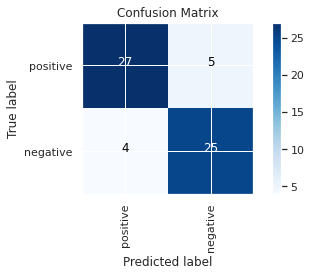

In [602]:
draw_results(X_test, y_test, logistic_clf)

### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

[Provide explanation for each measure here] 

TODO 

### Graph the resulting ROC curve of the model

In [603]:
!pip install scikit-plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


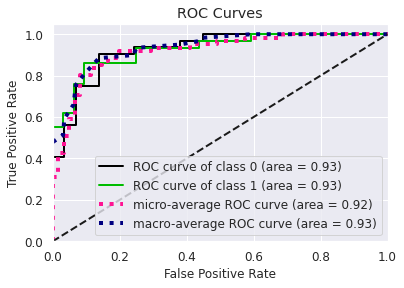

In [604]:
# pipe.predict_proba(X_test).shape



import scikitplot as skplt
import matplotlib.pyplot as plt

# ground truth labels
y_true = y_test
# predicted probabilities generated by sklearn classifier
y_probas = logistic_clf.predict_proba(X_test)


skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

### Describe what an ROC curve is and what the results of this graph seem to be indicating

[Discuss] 

The ROC curve shows the trade-off between sensitivity and specificity. Our Logistical Regression classifier gives a curve that is close to the top-left corner, indicating  a good performance. 


### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Report out the same metrics. Let's see how your results change!

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


accuracy:  0.8524590163934426
precision:  0.8333333333333334
recall:  0.8620689655172413
f1_score:  0.847457627118644
confusion matrix:  [[27  5]
 [ 4 25]]


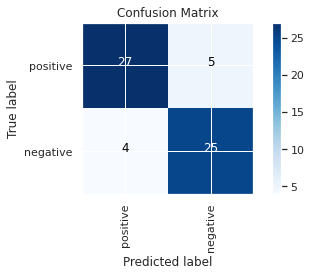

In [605]:
# Logistic Regression
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression



X_train, X_test, y_train, y_test = train_test_split(X_prepared, y_prepared, test_size=0.2, random_state=42)

logistic_clf =  LogisticRegression(solver='sag', max_iter=10, penalty='none')
logistic_clf.fit(X_train, y_train)
# logistic_clf.score(X_test, y_test)

draw_results(X_test, y_test, logistic_clf)

### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

accuracy:  0.8524590163934426
precision:  0.8333333333333334
recall:  0.8620689655172413
f1_score:  0.847457627118644
confusion matrix:  [[27  5]
 [ 4 25]]


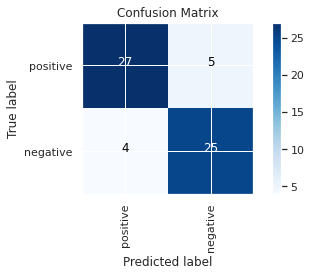

In [606]:
# Logistic Regression
# yes, it can be fixed when we set a higher max_iter
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression



X_train, X_test, y_train, y_test = train_test_split(X_prepared, y_prepared, test_size=0.2, random_state=42)

logistic_clf =  LogisticRegression(solver='sag', max_iter=100, penalty='none')
logistic_clf.fit(X_train, y_train)
# logistic_clf.score(X_test, y_test)

# y_true = y_test;
# y_pred = logistic_clf.predict(X_test)


# scores = precision_recall_fscore_support(y_true, y_pred, average='binary')
# f1 = f1_score(y_true, y_pred, average='binary')


# print("precision: ", scores[0])
# print("recall: ", scores[1])
# print("f1_score: ", f1)
# print("confusion matrix: ", confusion_matrix(y_true, y_pred))
# draw_confusion_matrix(y_true, y_pred, ['positive', 'negative'])
draw_results(X_test, y_test, logistic_clf)


### Explain what you changed, and why do you think, even though you 'fixed' the problem, that you may have harmed the outcome. What other Parameters you set may have impacted this result?

[Provide explanation here] 

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

accuracy:  0.819672131147541
precision:  0.7647058823529411
recall:  0.896551724137931
f1_score:  0.8253968253968255
confusion matrix:  [[24  8]
 [ 3 26]]


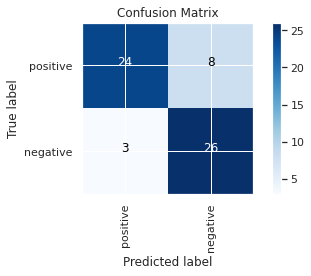

In [607]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
y = heartdisease['sick']
X = heartdisease.drop(columns=['sick'])

clf = LogisticRegression(random_state=0, penalty = 'l1', solver='liblinear').fit(X, y)

draw_results(X_test, y_test, clf)

# y_true = y_test;
# y_pred = clf.predict(X_test)


# scores = precision_recall_fscore_support(y_true, y_pred, average='binary')
# f1 = f1_score(y_true, y_pred, average='binary')


# clf.score(X,y)

# print("precision: ", scores[0])
# print("recall: ", scores[1])
# print("f1_score: ", f1)
# print("confusion matrix: ", confusion_matrix(y_true, y_pred))
# draw_confusion_matrix(y_true, y_pred, ['positive', 'negative'])



### Explain what what the two solver approaches are, and why the liblinear likely produced the optimal outcome. 

[Provide explanation here] 

### We also played around with different penalty terms (none, L1 etc.) Describe what the purpose of a penalty term is and how an L1 penalty works.

[Discuss prompt here]

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [608]:
# SVM
from sklearn.svm import SVC
svc_pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(probability=True))])
svc_pipe.fit(X_train, y_train)

svc_pipe.score(X_test, y_test)




0.8688524590163934

### Report the accuracy, precision, recall, F1 Score, and confusion matrix and ROC Curve of the resulting model.

accuracy:  0.8688524590163934
precision:  0.8387096774193549
recall:  0.896551724137931
f1_score:  0.8666666666666666
confusion matrix:  [[27  5]
 [ 3 26]]


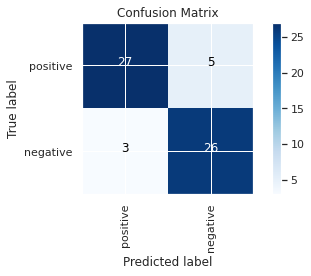

In [609]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# y_true = y_test;
# y_pred = svc_pipe.predict(X_test)

# accuracy = accuracy_score(y_test, svc_pipe.predict(X_test))
# confusion_matrix = confusion_matrix(y_true, y_pred)
# scores = precision_recall_fscore_support(y_true, y_pred, average='binary')

# print("precision: ", scores[0])
# print("recall: ", scores[1])
# print("f1_score: ", scores[2])
# print("confusion_matrix: ", confusion_matrix)

# draw_confusion_matrix(y_true, y_pred, ['positive', 'negative'])

draw_results(X_test, y_test, svc_pipe)
# svc_pipe.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


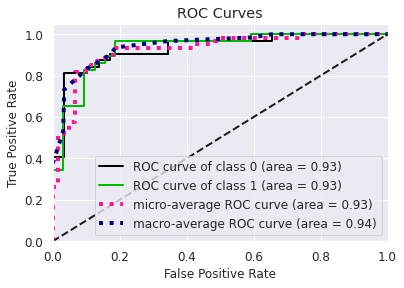

In [610]:
import scikitplot as skplt
import matplotlib.pyplot as plt

# ground truth labels
y_true = y_test
# predicted probabilities generated by sklearn classifier
y_probas = svc_pipe.predict_proba(X_test)


skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

accuracy:  0.8688524590163934
precision:  0.8620689655172413
recall:  0.8620689655172413
f1_score:  0.8620689655172413
confusion matrix:  [[28  4]
 [ 4 25]]


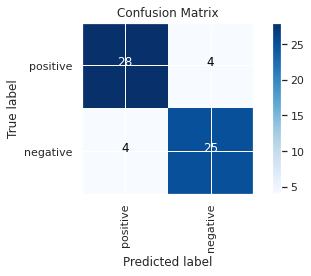

In [611]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


svc_pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])
svc_pipe.fit(X_train, y_train)
svc_pipe.score(X_test, y_test)

# y_true = y_test;
# y_pred = svc_pipe.predict(X_test)

# accuracy = accuracy_score(y_test, svc_pipe.predict(X_test))
# confusion_matrix = confusion_matrix(y_true, y_pred)
# scores = precision_recall_fscore_support(y_true, y_pred, average='binary')

# print("precision: ", scores[0])
# print("recall: ", scores[1])
# print("f1_score: ", scores[2])
# print("confusion_matrix: ", confusion_matrix)

draw_results(X_test, y_test, svc_pipe)
# y_pred
# y_true


### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

[Discuss Prompt here]

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

[Provide Answer here:] 

## Baysian (Statistical) Classification

In class we will be learning about Naive Bayes, and statistical classification.

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable Y  and dependent feature vector X1 through Xn. 

### Please implement a Naive Bayes Classifier on the pipelined data. For this model simply use the default parameters. Report out the number of mislabeled points that result (i.e., both the false positives and false negatives), along with the accuracy, precision, recall, F1 Score and Confusion Matrix. Refer to documentation on implementing a NB Classifier [here](https://scikit-learn.org/stable/modules/naive_bayes.html)

Number of mislabeled points out of a total 61 points : 9
accuracy:  0.8524590163934426
precision:  0.875
recall:  0.7777777777777778
f1_score:  0.823529411764706
confusion matrix:  [[31  3]
 [ 6 21]]


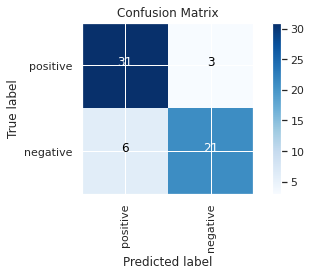

In [612]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb_pipe =  Pipeline([('scaler', StandardScaler()), ('gnb', GaussianNB())])
gnb_pipe.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))



# y_true = y_test;
# y_pred = gnb_pipe.predict(X_test)

# y_true
# y_pred

# accuracy = accuracy_score(y_test, gnb_pipe.predict(X_test))
# confusion_matrix = confusion_matrix(y_true, y_pred)
# scores = precision_recall_fscore_support(y_true, y_pred, average='binary')

# print("precision: ", scores[0])
# print("recall: ", scores[1])
# print("f1_score: ", scores[2])
# print("confusion_matrix: ", confusion_matrix)

draw_results(X_test, y_test, gnb_pipe)

In [613]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import precision_recall_fscore_support


# gnb_pipe = Pipeline([('scaler', StandardScaler()), ('gnb',GaussianNB())])
# gnb_pipe.fit(X_train, y_train)
# gnb_pipe.score(X_test, y_test)

# y_true = y_test;
# y_pred = gnb_pipe.predict(X_test)

# accuracy = accuracy_score(y_test, svc_pipe.predict(X_test))
# confusion_matrix = confusion_matrix(y_true, y_pred)
# scores = precision_recall_fscore_support(y_true, y_pred, average='binary')

# print("precision: ", scores[0])
# print("recall: ", scores[1])
# print("f1_score: ", scores[2])
# print("confusion_matrix: ", confusion_matrix)

### Discuss the observed results. What assumptions about our data are we making here and why might those be inacurate?

[Discuss here]
We assume the target has correlation with every feature, we also assume the 13 feature determines the value of the target. But this is not necessary true, there might be more featere/reasons/factors that we have not included and affects the target value. 

## Cross Validation and Model Selection

You've sampled a number of different classification techniques, leveraging clusters, linear classifiers, and Statistical Classifiers, as well as experimented with tweak different parameters to optimize perfiormance. Based on these experiments you should have settled on a particular model that performs most optimally on the chosen dataset. 

Before our work is done though, we want to ensure that our results are not the result of the random sampling of our data we did with the Train-Test-Split. To ensure otherwise we will conduct a K-Fold Cross-Validation of our top two performing models, assess their cumulative performance across folds, and determine the best model for our particular data. 

## Select your top 2 performing models and run a K-Fold Cross Validation on both (use 10 folds). Report your best performing model.

In [614]:
#  The top 2 performing models are: 
#   1. StandardScaler + KNN(K=5 OR 7) --> ACCURACY = 0.9180327868852459
#   2. StandardScaler + SVC --> ACCURACY = 0.8688524590163934

In [615]:
from sklearn.model_selection import KFold

[Discuss]